<a href="https://colab.research.google.com/github/RPW-11/Logistic-Regression-with-SMOTE-and-Random-Forest-with-Hyperparameter-Tuning/blob/main/Logistic_Regression_with_SMOTE_and_Random_Forest_with_Hyperparameter_Tuning_on_Students_Adaptivity_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with SMOTE and Random Forest with Hyperparameter Tuning on Students Adaptivity Dataset.ipynb

by Ida Bagus Kade Rainata Putra Wibawa

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# load the data set
df = pd.read_csv('/content/drive/MyDrive/dataset/students_adaptibility/students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


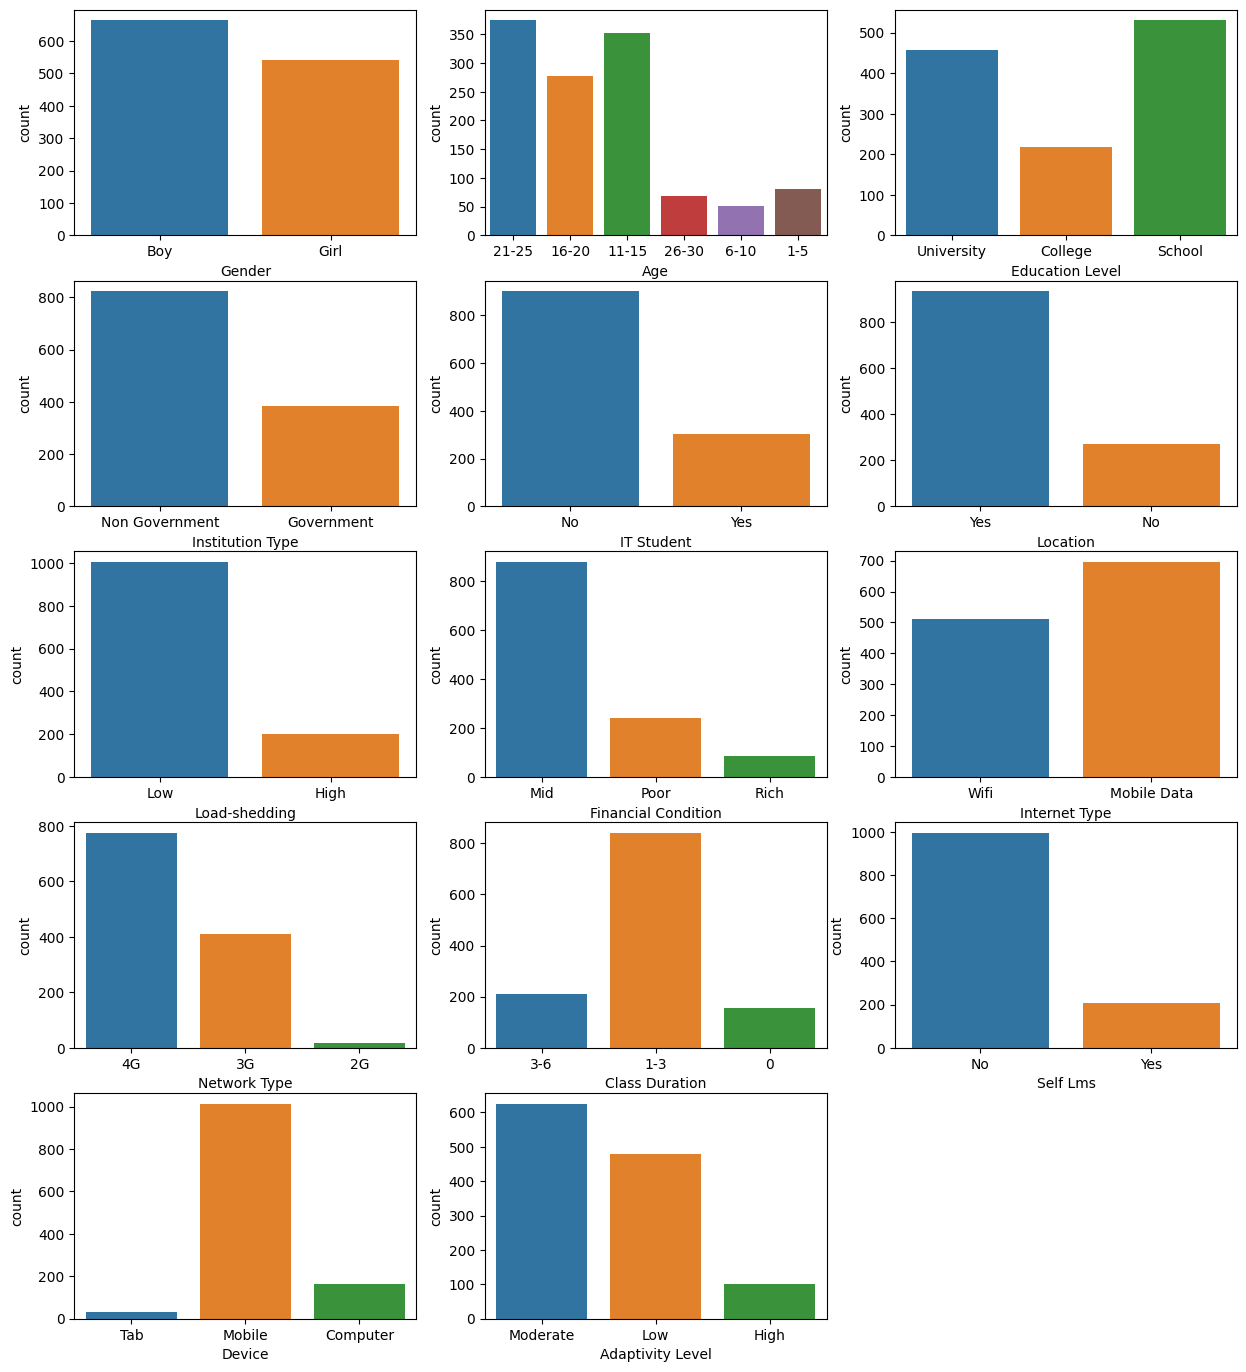

In [4]:
#inspect the distribution of all of the features
plt.figure(figsize=(15,17))
for i in range(len(df.columns)):
  plt.subplot(5,3,i+1)
  sns.countplot(x=df.columns[i], data=df)

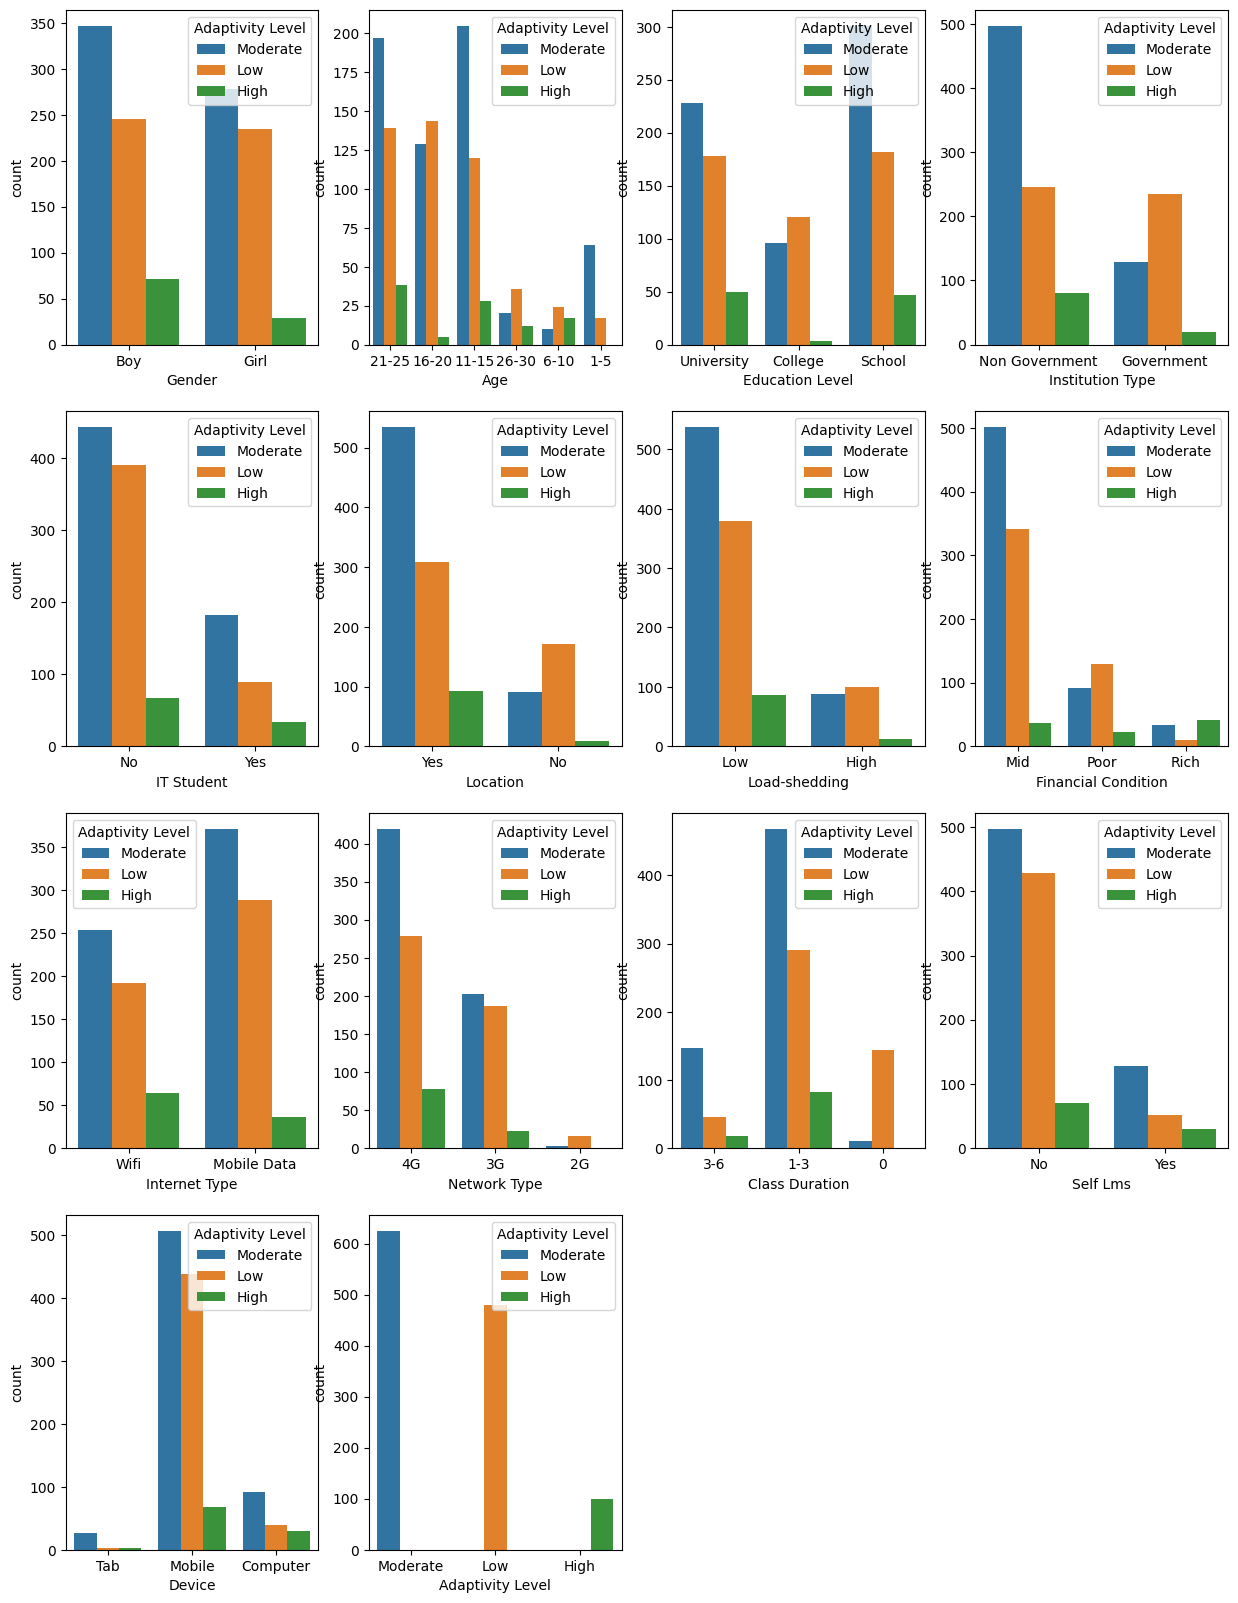

In [5]:
# ADAPTIVITY LEVEL IS OUR DEPENDANT VARIABLE (TARGET VARIABLE)
# LET'S TRY TO PLOT EACH OF THE FEATURE RESPECTIVE TO ADAPTIVITY LEVEL
plt.figure(figsize=(15,20))
for i in range(len(df.columns)):
  plt.subplot(4,4,i+1)
  sns.countplot(x=df.columns[i], hue='Adaptivity Level', data=df)

It looks like we have an `imbalance` distribution in our target variable. We'll be performing 2 types classification method.


1.   Using the imbalance data set
2.   Using balanced data set via `SMOTE`

We will also be performing the classification process using `Logistic Regression` and `Random Forest`



In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
lgr = LogisticRegression(max_iter=10000)

Next, let's split our data into 2 parts, which are `training set` and `test data set`

In [8]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :len(df.columns)-1]
y = df.iloc[:,-1]
print(f"X shape is {X.shape} and y shape is {y.shape}")

X shape is (1205, 13) and y shape is (1205,)


In [9]:
# encode to one hot encoded data
X = pd.get_dummies(X, dtype=int)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Gender_Boy                       1205 non-null   int64
 1   Gender_Girl                      1205 non-null   int64
 2   Age_1-5                          1205 non-null   int64
 3   Age_11-15                        1205 non-null   int64
 4   Age_16-20                        1205 non-null   int64
 5   Age_21-25                        1205 non-null   int64
 6   Age_26-30                        1205 non-null   int64
 7   Age_6-10                         1205 non-null   int64
 8   Education Level_College          1205 non-null   int64
 9   Education Level_School           1205 non-null   int64
 10  Education Level_University       1205 non-null   int64
 11  Institution Type_Government      1205 non-null   int64
 12  Institution Type_Non Government  1205 non-null  

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X train shape {X_train.shape} y train shape {y_train.shape}")
print(f"X test shape {X_test.shape} y test in shape {y_test.shape}")

X train shape (964, 35) y train shape (964,)
X test shape (241, 35) y test in shape (241,)


In [11]:
lgr.fit(X_train, y_train)
yhat_test = lgr.predict(X_test)
yhat_test[:5]

array(['Moderate', 'Moderate', 'Moderate', 'Low', 'Moderate'],
      dtype=object)

Let's evaluate this model using `confusion matrix` and `f1 score` to see the quality of our model.

In [12]:
from sklearn.metrics import confusion_matrix, f1_score

In [13]:
cm = confusion_matrix(yhat_test, y_test)
print(f"This is the confusion matrix")
cm

This is the confusion matrix


array([[11,  1,  3],
       [ 5, 68, 17],
       [ 7, 34, 95]])

Confusion matrix tells you the number of correct predictions made shown by the **diagonal** of the matrix.

In [14]:
print(f"The f1 score on training data set is {f1_score(lgr.predict(X_train), y_train, average='micro'):.2f}")
print(f"The f1 score on test data set is {f1_score(yhat_test, y_test, average='micro'):.2f}")

The f1 score on training data set is 0.73
The f1 score on test data set is 0.72


Let's try to use balanced data set to perform this classification problem. We'll use `SMOTE` technique to balance the dependent (target) variable **Adaptivity Level**

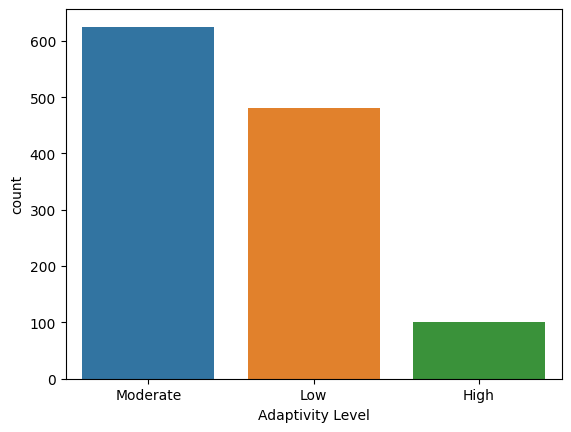

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

In [15]:
# let's see the distribution of the target value
sns.countplot(x='Adaptivity Level', data=df)
plt.show()
df['Adaptivity Level'].value_counts()

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
smote = SMOTE(random_state=42)
X_balance, y_balance = smote.fit_resample(X, y)
print(f"This is the prior shape of X {X.shape} and y shape {y.shape}")
print(f"This is the new shape of X {X_balance.shape} and y shape {y_balance.shape}")


This is the prior shape of X (1205, 35) and y shape (1205,)
This is the new shape of X (1875, 35) and y shape (1875,)


Moderate    625
Low         625
High        625
Name: Adaptivity Level, dtype: int64

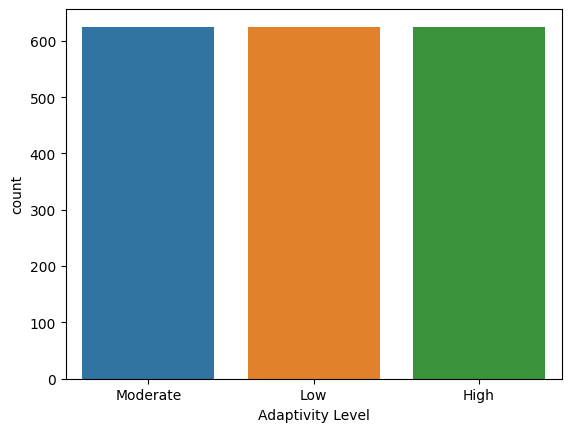

In [18]:
# check the brand new distribution
sns.countplot(x=y_balance,data=y_balance)
y_balance.value_counts()

In [19]:
# encode again with get dummies
X_encoded = pd.get_dummies(X_balance)
X_encoded.head()

,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,...,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,0,1,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
3,0,1,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0


In [20]:
# split the dataset into train data set and test data set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_balance, test_size=0.2, random_state=42)
print(f"X train shape {X_train.shape}, y train shape {y_train.shape}")
print(f"X test shape {X_test.shape}, y test shape {y_test.shape}")

X train shape (1500, 35), y train shape (1500,)
X test shape (375, 35), y test shape (375,)


In [21]:
# train our model
lgr = LogisticRegression(max_iter=10000)
lgr.fit(X_train, y_train)
yhat_test_balanced = lgr.predict(X_test)
yhat_test_balanced[:5]

array(['Low', 'High', 'Low', 'High', 'Moderate'], dtype=object)

In [22]:
# check the confusion matrix
confusion_matrix(yhat_test_balanced, y_test)

array([[111,   5,  11],
       [  0,  96,  23],
       [ 18,  29,  82]])

In [23]:
f1 = f1_score(y_test, yhat_test_balanced, average='micro')
print(f"The f1 score for the balanced data set is {f1:.2f}")

The f1 score for the balanced data set is 0.77


The balanced data made a little difference on the f1 score compare to the imbalance data. The difference is only **0.05**, where the balanced dataset has a higher f1 score

# Using Random Forest Classifier

Let's try to use `RandomForestClassifier` and see if we can get a better result.

In [26]:
from sklearn.ensemble import RandomForestClassifier

Let's try to train our model using default parameter first. The paramters that can be used are `n_estimator` (the number of Decision Tree that make up Random forest), `max_depth` (The maximum depth of the tree), and `min_samples_split` (The minimum number of samples required to split an internal node)

In [28]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
yhat_rand_forest = rand_forest.predict(X_test)
print("The predicted result")
yhat_rand_forest[:5]

The predicted result


array(['Moderate', 'High', 'Low', 'Moderate', 'Low'], dtype=object)

In [29]:
# check the confusion matrix
confusion_matrix(yhat_rand_forest, y_test)

array([[127,   2,   7],
       [  0, 120,  10],
       [  2,   8,  99]])

The result looks so much better than the `LogisticRegression` model. Let's see the value of its f1score

In [30]:
print(f"The f1 score for RandomForest model is {f1_score(yhat_rand_forest, y_test, average='micro'):.2f}")

The f1 score for RandomForest model is 0.92


The accuracy is pretty high, but I wonder if we can get a better result by tuning some of the hyperparameters of the model. Let's start from

In [31]:
min_sample_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None]

In [55]:
models = []
f1_scores = []
for min_sample in min_sample_list:
  model = RandomForestClassifier(min_samples_split=min_sample).fit(X_train, y_train)
  models.append(model)
  yhat = model.predict(X_test)
  f1_scores.append(f1_score(yhat, y_test, average='micro'))

# get the best min number of split
best_min_split = min_sample_list[np.argmax(f1_scores)]


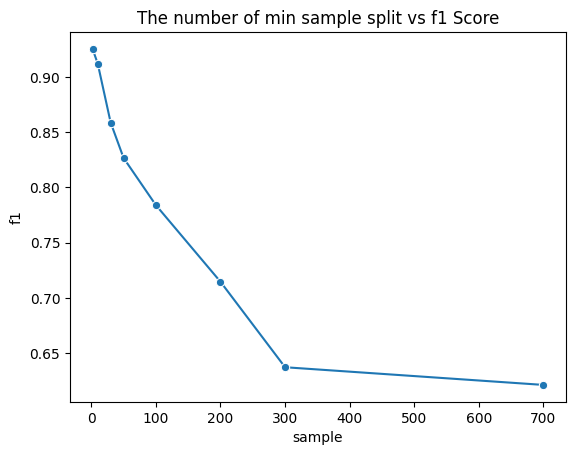

In [56]:
# Let's plot the result
data = pd.DataFrame({'sample' : min_sample_list, 'f1' : f1_scores})
plt.title('The number of min sample split vs f1 Score')
sns.lineplot(data=data, x='sample', y='f1', marker='o')

plt.show()

In [62]:
print(f"The best value for minimum split is {best_min_split}")

The best value for minimum split is 2


In [58]:
f1_scores = []
for max_depth in max_depth_list:
  model = RandomForestClassifier(max_depth = max_depth).fit(X_train, y_train)
  yhat = model.predict(X_test)
  f1_scores.append(f1_score(yhat, y_test, average='micro'))

# get the best max depth
best_max_depth = max_depth_list[np.argmax(f1_scores)]


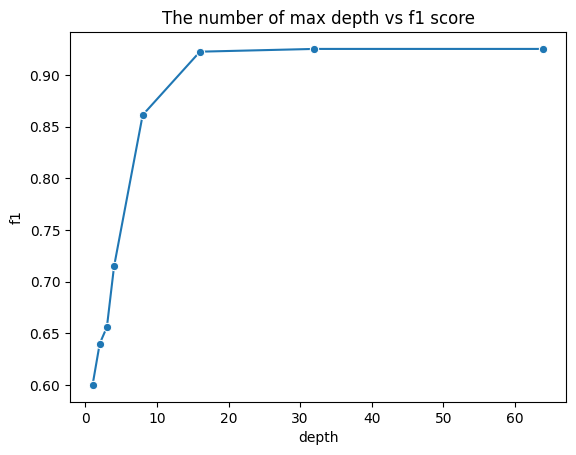

In [52]:
# Let's plot the result
data = pd.DataFrame({'depth' : max_depth_list, 'f1' : f1_scores})
plt.title('The number of max depth vs f1 score')
sns.lineplot(data=data, x='depth', y='f1', marker='o')

plt.show()

In [63]:
print(f"The best value for parameter max depth is {best_max_depth}")

The best value for parameter max depth is None


In [60]:
# n estimator parameter
n_estimators_list = [10,50,100,500]
f1_scores = []
for n in n_estimators_list:
  model = RandomForestClassifier(n_estimators=n).fit(X_train, y_train)
  yhat = model.predict(X_test)
  f1_scores.append(f1_score(yhat, y_test, average='micro'))

# get the best max depth
best_nestimator = n_estimators_list[np.argmax(f1_scores)]

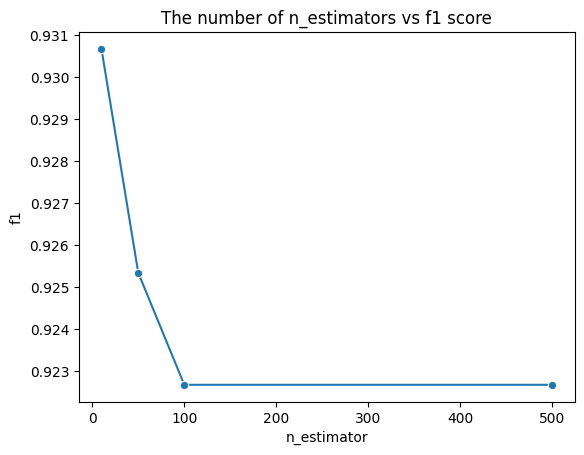

In [61]:
# let's plot the result
data = pd.DataFrame({'n_estimator' : n_estimators_list, 'f1' : f1_scores})
plt.title('The number of n_estimators vs f1 score')
sns.lineplot(data=data, x='n_estimator', y='f1', marker='o')

plt.show()

In [64]:
print(f"The best value for parameter n_estimators is {best_nestimator}")

The best value for parameter n_estimators is 10


It looks like the best value for `max_depth` and `min_sample_split` are both the default value of the `RandomForestClassifier`, but the best value for `n_estimators` parameter is 10 which is not the default value.

Let's train the data to get our final model of `RandomForestClassifier` using the parameters found and see the f1 score

*Note : To find the actual best values for these 3 parameters, we should find all the combinations for these three parameters. The method shown above might not be the most accurate way*

In [66]:
final_model = RandomForestClassifier(min_samples_split=best_min_split, max_depth=best_max_depth, n_estimators=best_nestimator)
final_model.fit(X_train, y_train)
yhat = final_model.predict(X_test)
print(f"The final f1 score for the final model is {f1_score(yhat, y_test, average='micro'):.2f}")

The final f1 score for the final model is 0.93
